In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mortality_data = pd.read_pickle("mortality_prepped.pkl")

In [7]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [8]:
mortality_wide = pd.read_pickle("mortality_wide.pkl")

In [9]:
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


In [10]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

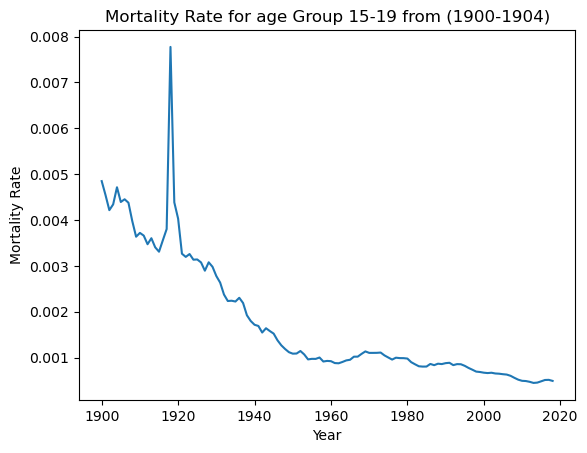

In [11]:
sns.lineplot(data=mortality_wide, x="Year", y="15-19 Years")
plt.title("Mortality Rate for age Group 15-19 from (1900-1904)")
plt.legend([], [], frameon=False)
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.show()

In [35]:
years = mortality_wide["Year"]
age_groups = ["01-04 Years", "05-09 Years", "10-14 Years", "15-19 Years"]

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

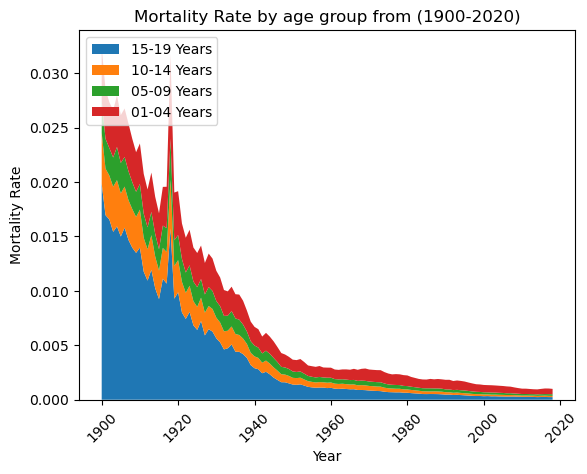

In [36]:
plt.stackplot(years, mortality_wide[age_groups].T, labels=age_groups)
plt.legend(loc="upper left", labels=age_groups[::-1])
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate by age group from (1900-2020)")
plt.xticks(rotation=45)

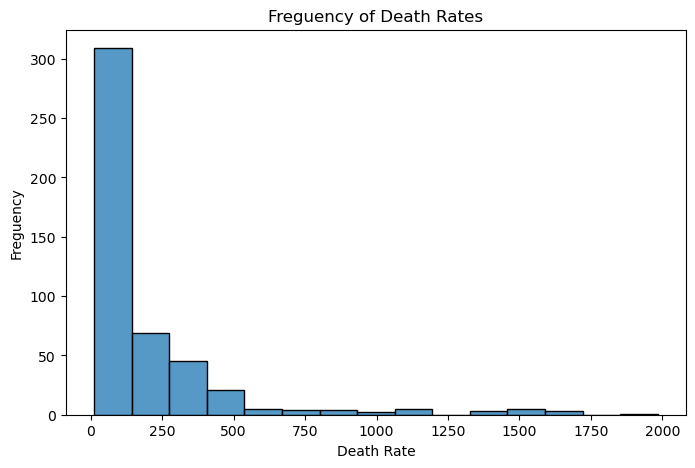

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(mortality_data["DeathRate"], bins=15, kde=False, edgecolor='black')
plt.title("Freguency of Death Rates")
plt.xlabel("Death Rate")
plt.ylabel("Freguency")
plt.show()

In [15]:
included_years = [1900, 1925, 1950, 1975, 2000]
mortality_new = mortality_data[mortality_data["Year"].isin(included_years)]

In [16]:
mortality_sum = mortality_new.groupby("Year")["DeathRate"].sum()

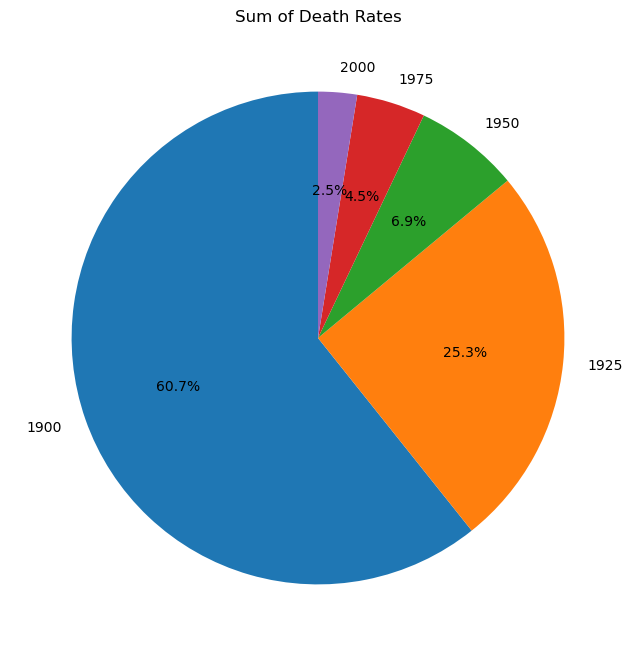

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(mortality_sum, labels=mortality_sum.index, autopct='%1.1f%%', startangle=90)
plt.title("Sum of Death Rates")
plt.show()

In [18]:
years_included = [1900, 1925, 1950, 1975]
new_mortality = mortality_data[mortality_data["Year"].isin(years_included)]


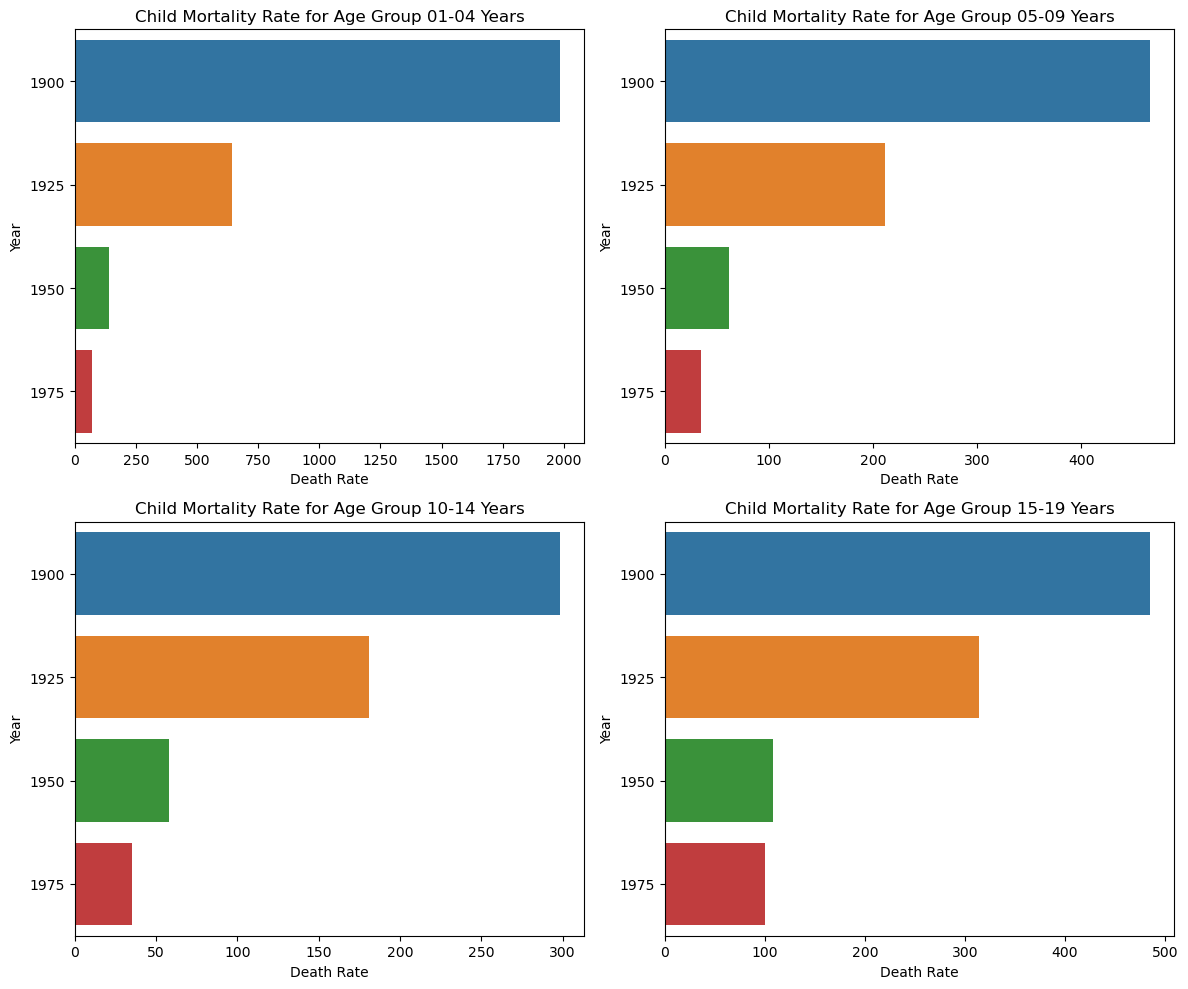

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

age_groups = new_mortality["AgeGroup"].unique()
years = [1900, 1925, 1950, 1975]

for i, age_group in enumerate(age_groups):
    
    data = new_mortality[(new_mortality["AgeGroup"] == age_group) & (new_mortality["Year"].isin(years))]
    
    ax = axes[i // 2, i % 2]
    
    sns.barplot(x="DeathRate", y="Year", data=data, ax=ax, orient="h")
    
    ax.set_title(f"Child Mortality Rate for Age Group {age_group}")
    ax.set_xlabel("Death Rate")
    ax.set_ylabel("Year")

plt.tight_layout()
plt.show()

In [27]:
new_data2 = mortality_data[(mortality_data["Year"] >= 1915) & (mortality_data["Year"] <= 1920)]
                                                                           
                          

/Users/andrewbilew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


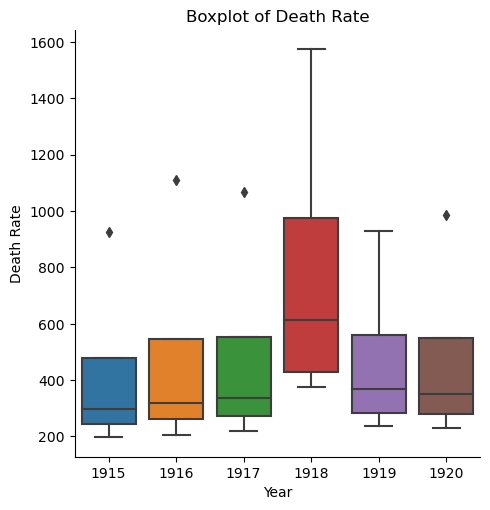

In [28]:
sns.catplot(data=new_data2, x="Year", y="DeathRate", kind="box")
plt.title("Boxplot of Death Rate")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.show()

/Users/andrewbilew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


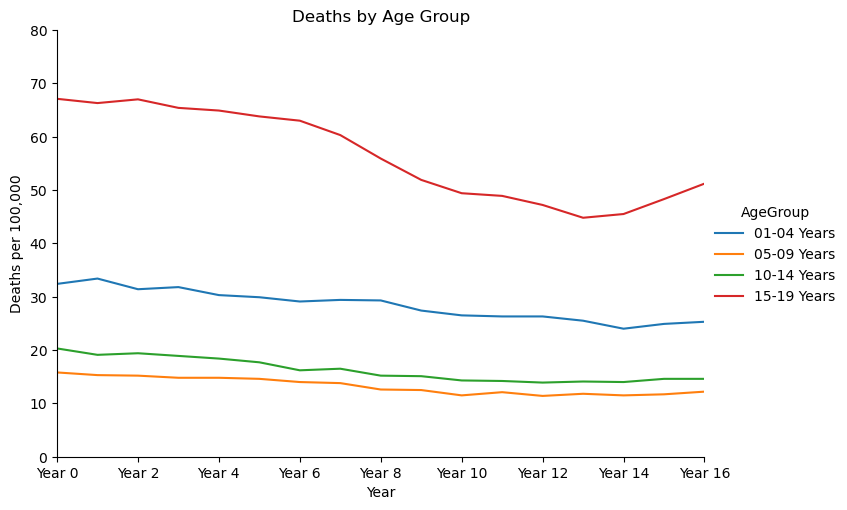

In [32]:
graph = sns.relplot(
        data=mortality_data,
        x="Year",
        y="DeathRate",
        hue="AgeGroup",
        kind="line",
        aspect=1.5)

graph.set(title="Deaths by Age Group")
graph.set_ylabels("Deaths per 100,000")


graph.set(xlim=(2000, 2016), ylim=(0, 80))

ax = graph.ax

ax.set_xticks(range(2000, 2017, 2))
ax.set_xticklabels([f"Year {i}" for i in range(0, 17, 2)])

plt.show()